In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import gdal
import os
import subprocess
from osgeo import gdal
from gdalconst import *

## Print  Data

<bound method Dataset.GetGeoTransform of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fa920d74930> >>
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


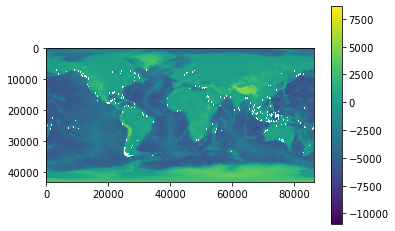

In [4]:
# print data(Bathymetry)

ds = gdal.Open('/Volumes/ZWL_Drive/File/data/TOZER_ETAL_2019_SRTM15+_SUPPLEMENTS_GEOTIFF/SRTM15+V2.0/SRTM15+V2.tiff')
array = ds.GetRasterBand(1).ReadAsArray()
plt.imshow(array)
plt.colorbar()
print(ds.GetGeoTransform)
print(ds.GetProjection())

<bound method Dataset.GetGeoTransform of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fd315ce5a80> >>
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


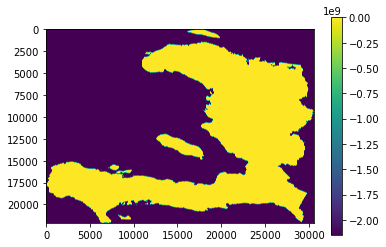

In [76]:
# print data(Bathymetry)

ds = gdal.Open('/Users/zhangwenlan/miniconda3/Download_data/Test/Haiti.tif')
array = ds.GetRasterBand(1).ReadAsArray()
plt.imshow(array)
plt.colorbar()
print(ds.GetGeoTransform)
print(ds.GetProjection())

## Merge Datalist  
### Merge with output file

In [3]:
# Rename command: $ rename 's/\d+/sprintf("%04d",$&)/e' *.tif

os.chdir('/Users/zhangwenlan/Downloads/M')
demlist1 = glob.glob('lidar_clipped_[0-9][0-9].tif')
# print(demlist1)
print(len(demlist1))

47


In [4]:
# cmd1 = 'gdal_merge.py -ps 10 -10 -o mergedLidar.tif'
cmd1 = 'gdal_merge.py -o MergedSec.tif'
subprocess.call(cmd1.split()+demlist1)

0

### Merge with VRT file

In [ ]:
os.chdir('/Users/zhangwenlan/miniconda3/Download_data/Test/test')
demlist1 = glob.glob('Lidar[0-9].tif')
# print(demlist1)
print(len(demlist1))

In [80]:
# Doesn't work somehow?
vrt = gdal.BuildVRT('merge.vrt', demlist1)
gdal.Translate('mergeDEM.tif', vrt, xRes = 10, yRes = -10)
vrt = None

ValueError: Received a NULL pointer.

<bound method Dataset.GetGeoTransform of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fda9d5cc420> >>
PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]


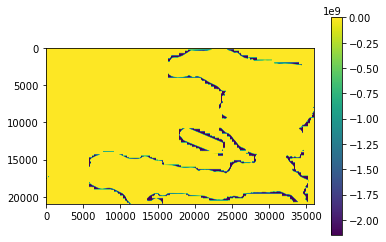

In [31]:
# Print merged file
ds_merge = gdal.Open('/Volumes/ZWL_Drive/File/Lidar/All/Merged_1/mergedDEM.tif')
array2 = ds_merge.GetRasterBand(1).ReadAsArray()
plt.imshow(array2)
plt.colorbar()
print(ds_merge.GetGeoTransform)
print(ds_merge.GetProjection())

## Reproject

In [7]:
# Haiti to Bathymetry
# Bathymetry: EPSG:4326
# Haiti: EPSG:32618
os.chdir('/Users/zhangwenlan/Downloads/')
RasIn = 'Port_au_prince_lidar_strm_mixup_highres.tif'
RasOut = 'Rpj.tif'
dsReprj = gdal.Warp(RasOut, RasIn, dstSRS = 'EPSG:4326')

<bound method Dataset.GetGeoTransform of <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fd4541fcc60> >>
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


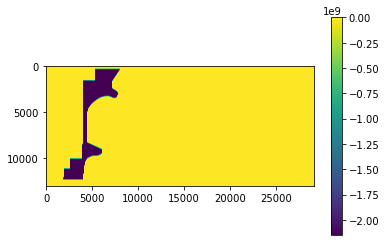

In [6]:
# Print Reprojected file
ds_merge = gdal.Open('/Users/zhangwenlan/Downloads/M/MergedSecRpj.tif')
array2 = ds_merge.GetRasterBand(1).ReadAsArray()
plt.imshow(array2)
plt.colorbar()
print(ds_merge.GetGeoTransform)
print(ds_merge.GetProjection())

## Fill-missing-data

In [3]:
# Fill missing data by interpolating from valid pixels around 

RasInOut = gdal.Open("/Volumes/ZWL_Drive/File/HaitiData/Merged/MergedHurricane.tif", GA_Update) 
Rasband = RasInOut.GetRasterBand(1)
result = gdal.FillNodata(targetBand = Rasband, maskBand = None, maxSearchDist = 5, smoothingIterations = 0)
print (result)

0


## Clip Raster

In [93]:
# Clip raster (Bathymetry) with a shapefile_polygon
gdal.UseExceptions()

RasIn = '/Volumes/ZWL_Drive/File/Lidar/All/4.Clip/MergeRpjFilled3.tif'
ShpIn = '/Users/zhangwenlan/miniconda3/Download_data/ShpFile/Valid_shp/Valid_Shp.shp'
RasOut = '/Volumes/ZWL_Drive/File/Lidar/All/4.Clip/Clipped3.tif'
# ds_clip = gdal.Warp(RasOut, RasIn, cutlineDSName = ShpIn, cropToCutline = True, dstNodata = np.nan)
# ds_clip = gdal.Warp(RasOut, RasIn, cutlineDSName = ShpIn, cropToCutline = True, dstNodata = None)
ds_clip = gdal.Warp(RasOut, RasIn, cutlineDSName = ShpIn, cropToCutline = True)

# or
# dsClip = gdal.Warp('demClip.tif', ds, cutlineDSName = '', cropToCutline = True, dstNodata = np.nan)
# Output, Original, ShapeFileName

## Resampling

In [71]:
os.chdir('/Users/zhangwenlan/miniconda3/Download_data/test')

RasIn = 'Merge3_ClipOut.tif'
RasOut = 'Rsp_HL.tif'
RasRpj = gdal.Warp(RasOut, RasIn, xRes = 0.005, yRes = 0.005)

In [64]:
# merge - doesn't work
import glob
import os

file_list = glob.glob("/Users/zhangwenlan/miniconda3/Download_data/test/*.tif")

files_string = " ".join(file_list)

command = "gdal_merge.py -o output.tif -of gtiff " + files_string

os.system(command)

256

In [68]:
# another merge script

import arcpy
from arcpy import env

# Set overwrite
arcpy.env.overwriteOutput = 1

# Set environment
env.workspace = r'C:\temp'
Dir = env.workspace

# Produce a list of raster datasets
rasters = arcpy.ListRasters()
list = ";".join(rasters)

# Raster to new mosaic
output = "new_dem" 
arcpy.MosaicToNewRaster_management(list,Dir, output, "", "", "", 1, "MINIMUM") 

ModuleNotFoundError: No module named 'arcpy'